In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.rcParams['figure.figsize']=(8,8) #rescale figures

use_h5ad_files = True # Change this to false if you don't have my file :P

In [2]:
# Download files from here
# https://github.com/CaiGroup/seqFISH-PLUS/raw/master/celltype_annotations.zip
# https://github.com/CaiGroup/seqFISH-PLUS/blob/master/sourcedata.zip

# Cluster annotations
# https://static-content.springer.com/esm/art%3A10.1038%2Fs41586-019-1049-y/MediaObjects/41586_2019_1049_MOESM3_ESM.xlsx

## Procedure

https://www.nature.com/articles/s41586-019-1049-y

To spatially map back the clusters on the raw image, we performed Louvain clustering on cortex, SVZ and choroid plexus data, and olfactory bulb data separately. Genes with max count greater than four across all cells were chosen for cortex and SVZ (include choroid plexus cells) data. Next, we filtered out cells with less than 200 genes expressed from the analysis. The counts were normalized per cell and a minimum dispersion of greater than 0 with min_mean of 0.05 was chosen to filter out the variable genes. This yielded 1,813 genes for subsequent analysis. For the olfactory bulb, genes with max count greater than two across all cells were first chosen. Then the counts were normalized per cell. To obtain the highly variable genes, a threshold of min_mean of 0.05 and min_dispersion of 0.2 was chosen. This yields 1,972 genes for subsequent analysis. After choosing the highly variable genes, the data were subjected to PCA reduction, computed neighbourhood graph with top PCs, and Louvain clustering. The top 20 enrichment genes were obtained using rank_genes_groups function and the clusters were identified according to published literature. Sub-clustering of the main cluster was performed by repeating the process described above. The visualization of these clusters to two dimensions using UMAP was done with the SCANPY function. These cluster numbers were mapped back to the original data to visualize the spatial heterogeneity of different cell types across different parts of the tissues.

## Cortex data

* Filter out genes with max count greater than four across all cells, and cells with less than 200 genes
* Normalize counts per cell
* HVG settings: minimum dispersion of greater than 0 and min_mean of 0.05 (=1,813 genes left)
* PCA, neighborhood graph, and Louvain clustering

In [3]:
if not use_h5ad_files:
    cortex_svz = sc.read("../data/raw_data/seqFISH_eng2019/cortex_svz_counts.csv")
    cortex_svz_annot = pd.read_csv("../data/raw_data/seqFISH_eng2019/cortex_svz_cell_type_annotations.csv")
    cortex_svz.obs['louvain'] = pd.Series(cortex_svz_annot['louvain'], dtype="category").values

else: 
    cortex_svz = sc.read_h5ad("../standards/reference/gold_standard_1.h5ad")
    cortex_svz.obs['louvain'] = pd.Series(cortex_svz.obs['louvain'], dtype="category")
    
print(cortex_svz)

AnnData object with n_obs × n_vars = 906 × 10000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'louvain', 'celltype', 'Field.of.View', 'X', 'Y', 'celltype_coarse', 'Region'
    var: 'features'


In [4]:
cortex_svz = cortex_svz[:, np.max(cortex_svz.X, axis=0) > 4]
sc.pp.filter_cells(cortex_svz, min_genes=200)
sc.pp.calculate_qc_metrics(cortex_svz, percent_top=None, log1p=False, inplace=True)
sc.pp.normalize_total(cortex_svz, target_sum=1e4)
sc.pp.log1p(cortex_svz)
sc.pp.highly_variable_genes(cortex_svz, min_mean=0.05, min_disp=0)
print("There are {} HVGs.".format(sum(cortex_svz.var['highly_variable'])))

C:\Users\Sai\anaconda3\envs\squidpy\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.obs` of view, copying.


There are 1819 HVGs.


In [5]:
cortex_svz.raw = cortex_svz
cortex_svz = cortex_svz[:, cortex_svz.var.highly_variable]
sc.pp.regress_out(cortex_svz, ['total_counts'])
sc.pp.scale(cortex_svz)
sc.pp.pca(cortex_svz, n_comps = 20, svd_solver='arpack')
sc.pp.neighbors(cortex_svz)
sc.tl.umap(cortex_svz)

C:\Users\Sai\anaconda3\envs\squidpy\lib\site-packages\anndata\_core\anndata.py:1208: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'celltype' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'celltype_coarse' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Region' as categorical
C:\Users\Sai\anaconda3\envs\squidpy\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


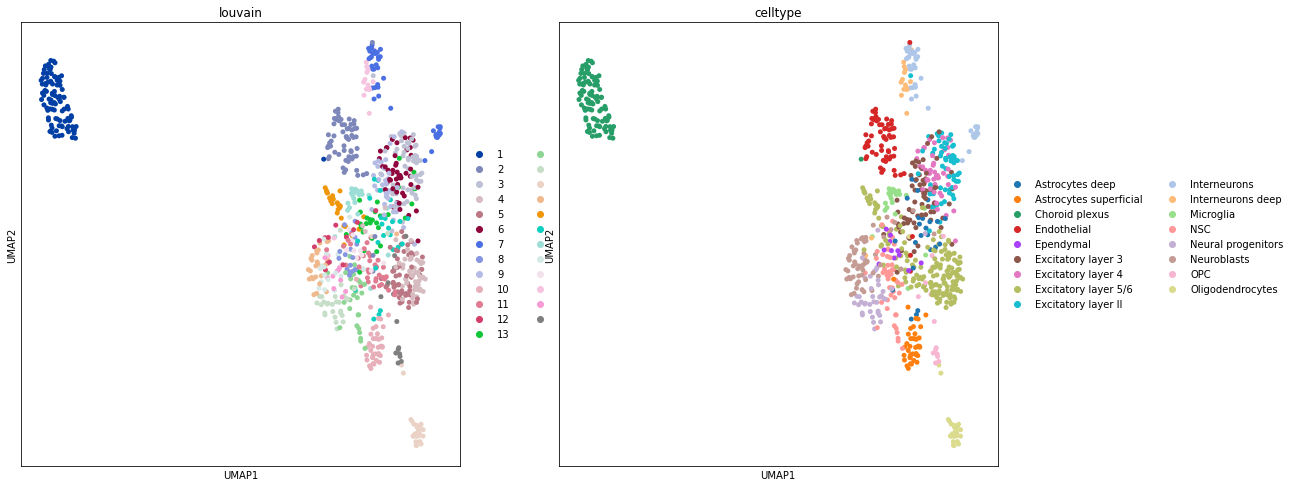

In [18]:
if not use_h5ad_files:
    sc.pl.umap(cortex_svz, color=['louvain'], size=100)

else:
    sc.pl.umap(cortex_svz, color=['louvain', 'celltype'], size=100)

## Olfactory bulb

* Filter out genes with max count greater than two across all cells
* Normalize counts per cell
* HVG settings: minimum dispersion of greater than 0.2 and min_mean of 0.05 (=1,972 genes left)
* PCA, neighborhood graph, and Louvain clustering


In [7]:
if not use_h5ad_files:
    ob = sc.read("../data/raw_data/seqFISH_eng2019/ob_counts.csv")
    ob_annot = pd.read_csv("../data/raw_data/seqFISH_eng2019/ob_cell_type_annotations.csv")
    ob.obs['louvain'] = pd.Series(ob_annot['louvain'], dtype="category").values

else:
    ob = sc.read_h5ad("../standards/reference/gold_standard_2.h5ad")
    ob.obs['louvain'] = pd.Series(ob.obs['louvain'], dtype="category")  
    
print(ob)

AnnData object with n_obs × n_vars = 2050 × 10000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'louvain', 'celltype', 'Field.of.View', 'X', 'Y', 'celltype_coarse', 'Region'
    var: 'features'


In [8]:
ob = ob[:, np.max(ob.X, axis=0) > 2]
sc.pp.calculate_qc_metrics(ob, percent_top=None, log1p=False, inplace=True)
sc.pp.normalize_total(ob, target_sum=1e4)
sc.pp.log1p(ob)
sc.pp.highly_variable_genes(ob, min_mean=0.05, min_disp=0.2)
print("There are {} HVGs.".format(sum(ob.var['highly_variable'])))

C:\Users\Sai\anaconda3\envs\squidpy\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.obs` of view, copying.


There are 2176 HVGs.


In [9]:
ob.raw = ob
ob = ob[:, ob.var.highly_variable]
sc.pp.regress_out(ob, ['total_counts'])
sc.pp.scale(ob)

C:\Users\Sai\anaconda3\envs\squidpy\lib\site-packages\anndata\_core\anndata.py:1208: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'celltype' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'celltype_coarse' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Region' as categorical


In [10]:
sc.pp.pca(ob, svd_solver='arpack', n_comps=20, use_highly_variable=True)
sc.pp.neighbors(ob)
sc.tl.umap(ob)

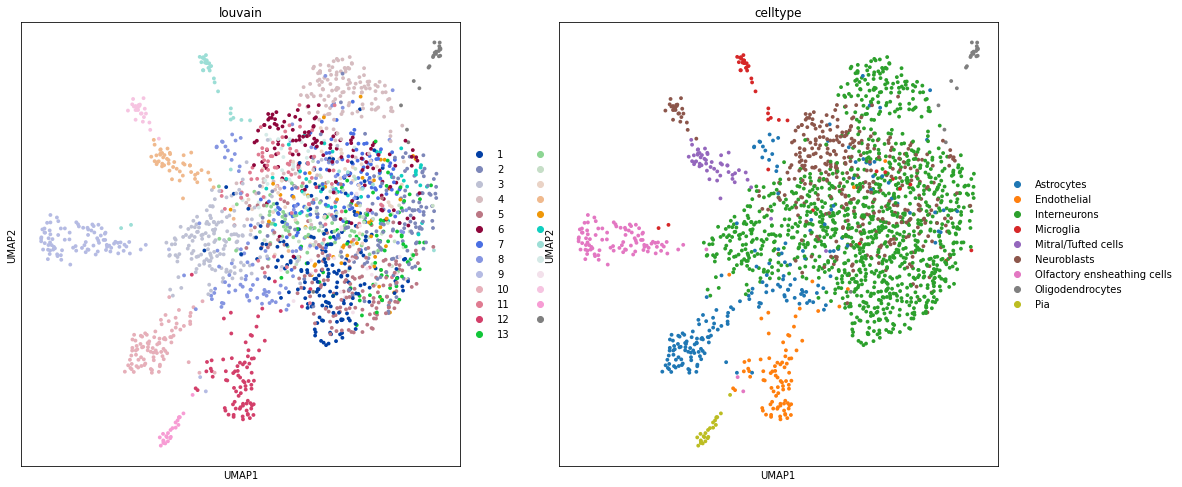

In [14]:
if not use_h5ad_files:
    sc.pl.umap(ob, color=['louvain'])

else:
    sc.pl.umap(ob, color=['louvain', 'celltype'])